# 第6章: 英語テキストの処理
英語のテキスト[nlp.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/nlp.txt)に対して，以下の処理を実行せよ．

In [1]:
!wc -l data/nlp.txt

34 data/nlp.txt


In [2]:
!head data/nlp.txt

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages. As such, NLP is related to the area of humani-computer interaction. Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would b

In [3]:
infile_path = 'data/nlp.txt'

# 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

## パターン1
- 正規表現, finditer

[正規表現解析ツール](https://regexper.com/#%28.%2B%3F%29%28%24%7C%5B.%3B%3A%3F!%5D%5Cs%2B%28%3F%3D%5BA-Z%5D%29%29)

In [4]:
import re

In [5]:
def text2sent(f):
    for line in f:
        for sentence in re.finditer(r"(.+?)($|[.;:?!]\s+(?=[A-Z]))",line):
            yield sentence.group().strip()

In [6]:
%%timeit
with open(infile_path) as f:
    for line in text2sent(f):
        pass

626 µs ± 47.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## パターン2
- 正規表現, split

In [7]:
def text2sent(f):
    for line in f:
        for sentence in re.split(r"(?<=[.;:?!])\s+(?=[A-Z])",line.strip()):
            if sentence: yield sentence

In [8]:
%%timeit
with open(infile_path) as f:
    for line in text2sent(f):
        pass

399 µs ± 27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


- splitの方が1.6倍くらい早い

In [1]:
from itertools import islice

In [10]:
with open(infile_path) as f:
    for sent in islice(text2sent(f),5):
        print(sent)

Natural language processing
From Wikipedia, the free encyclopedia
Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages.
As such, NLP is related to the area of humani-computer interaction.
Many challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.


In [31]:
# memo
# 関数にファイルポインタを渡すのは気持ち悪いかも
# open with で ファイルを開いて閉じるので、関数内で完結させた方がいいかも？

# Rule-base
# nltk
# spaCy

In [22]:
# assert
a = 3
assert a == 3
print(a)

3


In [35]:
# assert
a = 3
assert a == 2, "コメント"
print(a)

AssertionError: コメント

In [25]:
# ワンライナーシリーズ
# grep
# sed
# perl

# 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [12]:
# 句読点等の除去
# re.sub(r'^\w\s','',sentence)
# strip(string.punctuation)

In [6]:
import string

In [13]:
def sent2word(sentence):
    for word in sentence.split():
        yield word.strip(string.punctuation)

In [14]:
with open(infile_path) as f:
    for sent in islice(text2sent(f),3):
        for word in sent2word(sent):
            print(word)
        print()

Natural
language
processing

From
Wikipedia
the
free
encyclopedia

Natural
language
processing
NLP
is
a
field
of
computer
science
artificial
intelligence
and
linguistics
concerned
with
the
interactions
between
computers
and
human
natural
languages



In [29]:
# memo
# sed G

# 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装として[stemming](https://pypi.org/project/stemming/)モジュールを利用するとよい．

In [27]:
from nltk import stem

In [28]:
stemmer = stem.PorterStemmer()
with open(infile_path) as f:
    for sent in islice(text2sent(f),3):
        for word in sent2word(sent):
            print(word, stemmer.stem(word), sep='\t')
        print()

Natural	natur
language	languag
processing	process

From	from
Wikipedia	wikipedia
the	the
free	free
encyclopedia	encyclopedia

Natural	natur
language	languag
processing	process
NLP	nlp
is	is
a	a
field	field
of	of
computer	comput
science	scienc
artificial	artifici
intelligence	intellig
and	and
linguistics	linguist
concerned	concern
with	with
the	the
interactions	interact
between	between
computers	comput
and	and
human	human
natural	natur
languages	languag



In [33]:
# 色々なstemer
# nltk
# stemming porter2
# snowballstemmer

# 53. Tokenization
[Stanford Core NLP](https://stanfordnlp.github.io/CoreNLP/)を用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [24]:
%%bash
~/Documents/lab/stanford-corenlp/stanford-corenlp-full-2018-02-27/corenlp.sh -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref -file data/nlp.txt
mv nlp.txt.xml work

java -mx5g -cp "/Users/konnoryuto/Documents/lab/stanford-corenlp/stanford-corenlp-full-2018-02-27/*" edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma,ner,parse,depparse,dcoref -file data/nlp.txt


[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [1.4 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.0 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7cla

### xmlファイルの確認

In [34]:
! head -n 20 work/nlp.txt.xml

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet href="CoreNLP-to-HTML.xsl" type="text/xsl"?>
<root>
  <document>
    <docId>nlp.txt</docId>
    <sentences>
      <sentence id="1">
        <tokens>
          <token id="1">
            <word>Natural</word>
            <lemma>natural</lemma>
            <CharacterOffsetBegin>0</CharacterOffsetBegin>
            <CharacterOffsetEnd>7</CharacterOffsetEnd>
            <POS>JJ</POS>
            <NER>O</NER>
            <Speaker>PER0</Speaker>
          </token>
          <token id="2">
            <word>language</word>
            <lemma>language</lemma>


### xmlの解析 [xml.etree.ElementTree](https://docs.python.jp/3/library/xml.etree.elementtree.html)

In [2]:
import xml.etree.ElementTree as ET
tree = ET.parse('work/nlp.txt.xml')
root = tree.getroot()

In [3]:
for word in islice(root.iter("word"),10):
    print(word.text)

Natural
language
processing
From
Wikipedia
,
the
free
encyclopedia
Natural


In [42]:
# memo
# ifで not equal をできるだけ使わない
# 可読性の向上
# readlinesはメモリ消費が激しい
# lxml

# corenlpの主要なオプション
- annotators = tokenize,ssplit,pos,lemma,ner,parse,dcoref

行う処理

- file = work/nlp_sents.txt

 入力ファイル
    
- outputExtension = .xml

 出力ファイル形式
    
- outputDirectory = work

 出力ディレクトリ
    
- ssplit.eolonly

 行末のみを文区切りとして扱う　(sentence segmentation済みであればtrueに)
    
- tokenize.whitespace

 空白のみを単語区切りとして扱う　(tokenization済みであればtrueに)
    
- Xmx[1-6]g

 corenlpのためにJavaが確保するRAMの量 (Xmx4gであれば4GB)。
    
 corenlpサイドとしては、2GB確保すれば十分でしょと言っている。

 メモリ使用量はどの処理を行うかにも大きく依存し、dcorefを行う場合メモリ使用量が比較的多くなるとのこと。


# 54. 品詞タグ付け
Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [4]:
for token in islice(root.iter("token"),10):
    
    word = token.find('word').text
    lemma = token.find('lemma').text
    pos = token.find('POS').text
    
    print(word, lemma, pos, sep='\t')

Natural	natural	JJ
language	language	NN
processing	processing	NN
From	from	IN
Wikipedia	Wikipedia	NNP
,	,	,
the	the	DT
free	free	JJ
encyclopedia	encyclopedia	NN
Natural	natural	JJ


In [1]:
# 複数人で作業するとき、前処理をするときは何を使ったのかを明記しておく

# 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

In [6]:
from itertools import groupby

In [7]:
# PERSONでgroupby
for is_person, token_g in groupby(root.iter("token"), key=lambda token: token.find("NER").text == 'PERSON'):
    if is_person:
        person_name = ' '.join(token.find("word").text for token in token_g)
        print(person_name)

Alan Turing
Joseph Weizenbaum
MARGIE
Schank
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Racter
Jabberwacky
Moore


# 56. 共参照解析
Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

### coreferenceの構造を確認

In [95]:
!grep -A 20 "<coreference>" work/nlp.txt.xml | head -n 20

    <coreference>
      <coreference>
        <mention representative="true">
          <sentence>1</sentence>
          <start>7</start>
          <end>16</end>
          <head>12</head>
          <text>the free encyclopedia Natural language processing -LRB- NLP -RRB-</text>
        </mention>
        <mention>
          <sentence>1</sentence>
          <start>17</start>
          <end>22</end>
          <head>18</head>
          <text>a field of computer science</text>
        </mention>
        <mention>
          <sentence>18</sentence>
          <start>23</start>
          <end>25</end>


### coreferenceの情報を抽出

In [15]:
coref_dic = {}

for ment in root.iter("mention"):
    if ment.get("representative"):  # 代表参照表現を抽出
        rep = ment.find("text").text
    else:
        coref_dic[ment[0].text, ment[1].text] = rep + ' ('  # 置換の最初 (sentence, start)
        coref_dic[ment[0].text, ment[2].text] = ')'  # 置換の最後 (sentence, end)

### 置換

In [16]:
def replace_sent2word(sent):  # sentenceから置換したものをword単位で出力
    for token in sent.iter("token"):
        ids = (sent.get("id"), token.get("id"))
        word = token.find("word").text
        
        if ids in coref_dic:  # 共参照情報が存在するとき
            yield coref_dic[ids]
        yield word
        
def replace_root2sent(root):  # rootから置換したものをsentence単位で出力
    for sents in root.iter("sentences"):
        for sent in sents:
            yield ' '.join(word for word in replace_sent2word(sent))

### 出力

In [17]:
for i in islice(replace_root2sent(root),10):
    print(i)

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is [the free encyclopedia Natural language processing -LRB- NLP -RRB-] ( a field of computer science ) , artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages .
As such , NLP is related to the area of humani-computer interaction .
Many challenges in NLP involve natural language understanding , that is , enabling [computers] ( computers ) to derive meaning from human or natural language input , and others involve natural language generation .
History The history of NLP generally starts in the 1950s , although work can be found from earlier periods .
In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the [Alan Turing] ( Turing ) test as a criterion of intelligence .
The Georgetown experiment in 1954 involved fully automatic tra

# 57. 係り受け解析
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

### dependenciesの構造を確認

In [97]:
!grep -A 20 'type="collapsed-dependencies"' work/nlp.txt.xml | head -n 20

        <dependencies type="collapsed-dependencies">
          <dep type="root">
            <governor idx="0">ROOT</governor>
            <dependent idx="18">field</dependent>
          </dep>
          <dep type="amod">
            <governor idx="3">processing</governor>
            <dependent idx="1">Natural</dependent>
          </dep>
          <dep type="compound">
            <governor idx="3">processing</governor>
            <dependent idx="2">language</dependent>
          </dep>
          <dep type="nsubj">
            <governor idx="18">field</governor>
            <dependent idx="3">processing</dependent>
          </dep>
          <dep type="case">
            <governor idx="5">Wikipedia</governor>
            <dependent idx="4">From</dependent>
grep: write error: Broken pipe


In [128]:
def get_cd_deps(root):  # 係り受け解析の結果だけを取ってくる
    for deps in root.iter("dependencies"):
        if deps.get("type") == "collapsed-dependencies":
            yield deps

In [122]:
from graphviz import Digraph

In [169]:
Graph = Digraph(format='png')

for deps in islice(get_cd_deps(root), 1):
    for dep in deps:
        gove = dep.find("governor")
        depe = dep.find("dependent")
        
        if depe.text not in string.punctuation:  # 記号は除外
            parent = gove.get("idx") + '.' + gove.text
            child = depe.get("idx") + '.' + depe.text
            Graph.edge(parent, child)

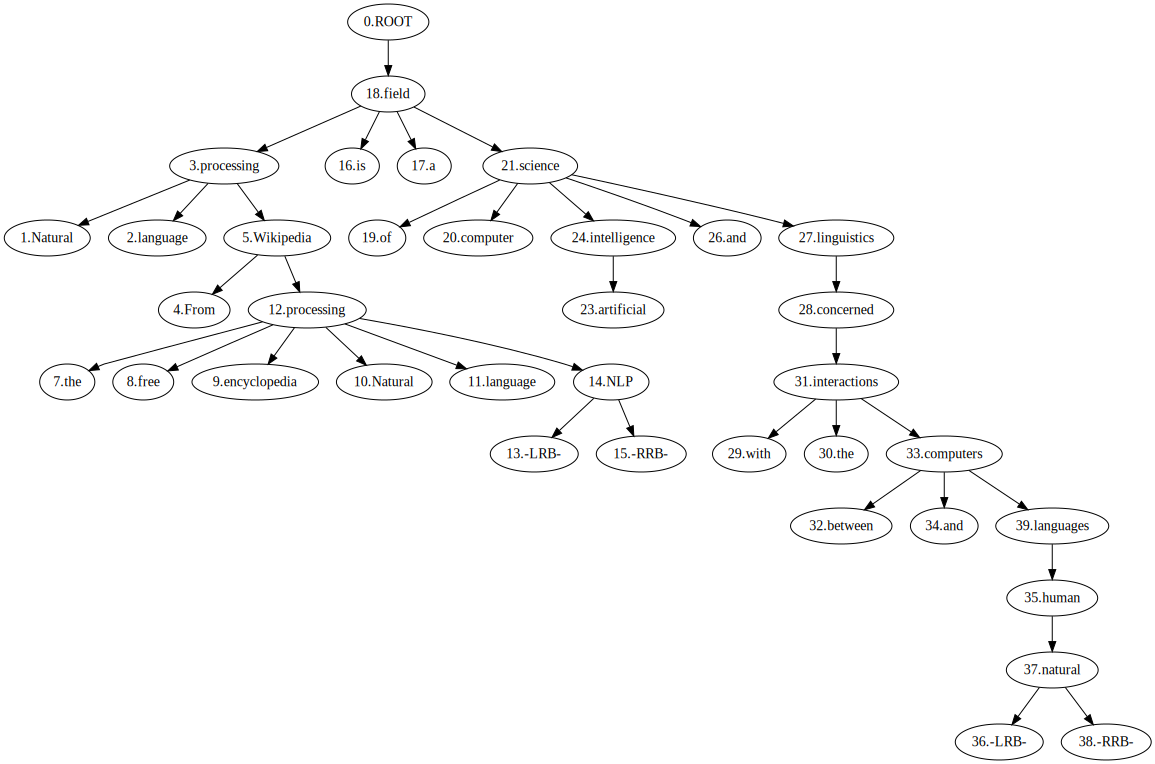

In [170]:
Graph

In [2]:
# memo
# more_itertools 、 nth
# dot言語で:は行末を表す

# 58. タプルの抽出
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．
- 述語: nsubj関係とdobj関係の子（dependent）を持つ単語
- 主語: 述語からnsubj関係にある子（dependent）
- 目的語: 述語からdobj関係にある子（dependent）

In [183]:
for deps in get_cd_deps(root):
    nsubj_dic = {}
    dobj_dic = {}
    
    for dep in deps:
        dep_type = dep.get("type")
        gove_tpl = (dep.find("governor").get("idx"), dep.find("governor").text)
        depe_tpl = (dep.find("dependent").get("idx"), dep.find("dependent").text)
        
        if dep_type == "nsubj":
            nsubj_dic[gove_tpl] = depe_tpl
        elif dep_type == "dobj":
            dobj_dic[gove_tpl] = depe_tpl
            
    for key in nsubj_dic:
        if key in dobj_dic:
            print(nsubj_dic[key][1], key[1], dobj_dic[key][1], sep='\t')

understanding	involve	generation
Turing	published	article
experiment	involved	translation
ELIZA	provided	interaction
patient	exceeded	base
ELIZA	provide	response
which	structured	information
underpinnings	discouraged	sort
that	underlies	approach
Some	produced	systems
which	make	decisions
that	contains	errors
implementations	involved	coding
algorithms	take	set
Some	produced	systems
which	make	decisions
models	have	advantage
they	express	certainty
Systems	have	advantages
procedures	make	use
that	make	decisions


# 59. S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

In [299]:
!grep -A 2 'NP ' work/nlp.txt.xml | head -n 2

        <parse>(ROOT (S (PP (NP (JJ Natural) (NN language) (NN processing)) (IN From) (NP (NNP Wikipedia))) (, ,) (NP (NP (DT the) (JJ free) (NN encyclopedia) (JJ Natural) (NN language) (NN processing)) (PRN (-LRB- -LRB-) (NP (NN NLP)) (-RRB- -RRB-))) (VP (VBZ is) (NP (NP (NP (DT a) (NN field)) (PP (IN of) (NP (NN computer) (NN science)))) (, ,) (NP (JJ artificial) (NN intelligence)) (, ,) (CC and) (NP (NP (NNS linguistics)) (VP (VBN concerned) (PP (IN with) (NP (NP (DT the) (NNS interactions)) (PP (IN between) (NP (NP (NNS computers)) (CC and) (NP (JJ human) (-LRB- -LRB-) (JJ natural) (-RRB- -RRB-) (NNS languages)))))))))) (. .))) </parse>
        <dependencies type="basic-dependencies">
grep: write error: Broken pipe


In [60]:
from toolz import sliding_window

In [132]:
# (NP .*)の内部だけ抜き出す
def get_NP(parse):
    is_NP = False
    c = 0
    for l, m, r in sliding_window(3, parse):
        if l == '(' and m == 'N' and r == 'P' and is_NP == False:
            is_NP = True
            
        if is_NP == True:          
            yield l
            
            if l == '(':
                c += 1
            
            elif l == ')':
                c -= 1
                
            if c == 0:
                yield '\n'
                is_NP = False

In [131]:
for parse in islice(root.iter("parse"), 1):
    lines = ''.join(get_NP(parse.text))
    print('------NPを取り出す(加工前)------')
    print(lines)
    
    print('------加工後------')
    for line in lines.strip().split('\n'):
        print(' '.join(re.findall(r' (\w*)\)', line)))

------NPを取り出す(加工前)------
(NP (JJ Natural) (NN language) (NN processing))
(NP (NNP Wikipedia))
(NP (NP (DT the) (JJ free) (NN encyclopedia) (JJ Natural) (NN language) (NN processing)) (PRN (-LRB- -LRB-) (NP (NN NLP)) (-RRB- -RRB-)))
(NP (NP (NP (DT a) (NN field)) (PP (IN of) (NP (NN computer) (NN science)))) (, ,) (NP (JJ artificial) (NN intelligence)) (, ,) (CC and) (NP (NP (NNS linguistics)) (VP (VBN concerned) (PP (IN with) (NP (NP (DT the) (NNS interactions)) (PP (IN between) (NP (NP (NNS computers)) (CC and) (NP (JJ human) (-LRB- -LRB-) (JJ natural) (-RRB- -RRB-) (NNS languages)))))))))

------加工後------
Natural language processing
Wikipedia
the free encyclopedia Natural language processing NLP
a field of computer science artificial intelligence and linguistics concerned with the interactions between computers and human natural languages


# ↑これはミス。 問題文の意図と違う
- 全通りのNPを表示しなければならない
- 上記は全体のNPをとってきただけ

- [S式 parser(nltk)](https://www.nltk.org/_modules/nltk/tokenize/sexpr.html)
- [S式 parser(inforno)](http://inforno.net/articles/2008/09/19/sexp-library-for-python)